Análisis de un conjunto de datos en formato CSV. 
Cada fila del conjunto de datos describe una campaña de marketing con la cantidad de dinero que una empresa determinadaha empleado en tres canales diferentes (cantidad de dinero invertida en miles de euros):  
    * televisión  
    * radio   
    * prensa  
Además de una última columna que lista las ventas conseguidas en dicha campaña (miles de unidades vendidas).

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 

sales = pd.read_csv("sales.csv")
sales

,id,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
205,196,38.2,3.7,13.8,7.6
206,197,94.2,4.9,8.1,9.7
207,198,177.0,9.3,6.4,12.8
208,199,NaN,42.0,66.2,25.5


**PRIMERA PARTE DEL PROYECTO**

In [2]:
sales_description = sales.describe()
sales_description

,id,TV,radio,newspaper,sales
count,210.000000,2.070000e+02,210.000000,210.000000,210.000000
mean,100.809524,1.449275e+10,23.200476,30.294762,13.959048
std,57.399481,1.198000e+11,14.827575,21.726517,5.196055
min,1.000000,7.000000e-01,0.000000,0.300000,1.600000
25%,52.250000,7.405000e+01,10.025000,12.025000,10.400000
50%,101.500000,1.498000e+02,22.400000,25.750000,12.900000
75%,149.750000,2.200500e+02,36.575000,44.900000,17.300000
max,200.000000,1.000000e+12,49.600000,114.000000,27.000000


El máximo de la columna "id" es de 200, cuando hay contabilizados 210, por lo que debe haber datos repetidos. Por lo que vamos a:  
* Primero: limpiar el conjunto de datos de aquellas filas en las que falten datos o haya valores extraños o fuera de rango. Axis=0 (para eliminar una fila), "any" (elimina cualquier fila que contenga uno o más NA).  
* Segundo: eliminar los duplicados. Elegimos "subset" para eliminar solo los duplicados de una determinada columna, en este caso la columna "id".

In [3]:
analyzed_sales = sales.dropna(axis=0, how="any")
analyzed_sales.describe()

,id,TV,radio,newspaper,sales
count,207.000000,2.070000e+02,207.000000,207.000000,207.000000
mean,100.144928,1.449275e+10,22.935266,29.914976,13.821739
std,57.309060,1.198000e+11,14.748775,21.623152,5.093872
min,1.000000,7.000000e-01,0.000000,0.300000,1.600000
25%,51.500000,7.405000e+01,9.950000,11.750000,10.350000
50%,101.000000,1.498000e+02,21.700000,25.600000,12.900000
75%,149.500000,2.200500e+02,36.400000,43.250000,17.150000
max,200.000000,1.000000e+12,49.600000,114.000000,27.000000


In [4]:
analyzed_sales = analyzed_sales.drop_duplicates(subset=["id"]) 
analyzed_sales.describe()

,id,TV,radio,newspaper,sales
count,197.000000,1.970000e+02,197.000000,197.000000,197.000000
mean,99.796954,1.522843e+10,22.986294,30.158883,13.879188
std,57.788225,1.227723e+11,14.765475,21.675698,5.112512
min,1.000000,7.000000e-01,0.000000,0.300000,1.600000
25%,50.000000,7.340000e+01,9.900000,12.600000,10.300000
50%,100.000000,1.498000e+02,22.300000,25.600000,12.900000
75%,150.000000,2.203000e+02,36.300000,43.300000,17.300000
max,200.000000,1.000000e+12,49.600000,114.000000,27.000000


Para ordenar los datos y reindexar (teniendo en cuenta los valores más grandes):

In [5]:
analyzed_sales.sort_values(by="TV", ascending=False) #utilizamos false para ordenar de forma descendente

,id,TV,radio,newspaper,sales
15,15,1.000000e+12,32.9,46.0,19.0
58,58,1.000000e+12,19.2,16.6,13.2
98,95,1.000000e+12,14.0,10.9,11.5
105,102,2.964000e+02,36.3,100.9,23.8
43,43,2.936000e+02,27.7,1.8,20.7
...,...,...,...,...,...
131,127,7.800000e+00,38.9,50.6,6.6
57,57,7.300000e+00,28.1,41.4,5.5
81,79,5.400000e+00,29.9,9.4,5.3
165,156,4.100000e+00,11.6,5.7,3.2


El valor más alto que encontramos dentro de los valores normales es 2.964000e+02, por lo que vamos a filtrar aquellos valores que sean menores de 300 (si, además, observamos el archivo csv, podremos ver que ningún valor es superior a este).

In [6]:
analyzed_sales = analyzed_sales[analyzed_sales.TV < 300]  #aplicamos una máscara para que nos muestre solo las filas dentro de esos valores
analyzed_sales.describe()

,id,TV,radio,newspaper,sales
count,194.000000,194.000000,194.000000,194.000000,194.000000
mean,100.474227,145.444845,23.001031,30.246392,13.868557
std,57.831646,86.032061,14.846077,21.747570,5.135792
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.250000,71.300000,9.675000,12.650000,10.300000
50%,101.500000,148.500000,22.400000,25.600000,12.850000
75%,150.750000,218.475000,36.450000,43.275000,17.275000
max,200.000000,296.400000,49.600000,114.000000,27.000000


Una vez hemos limpiado los datos, podemos pasar a realizar la representación gráfica de los mismos:  
- Calculamos el coeficiente de correlación de Pearson (regresión lineal simple)  
- Generamos la representación gráfica: fit_reg (True: realiza una regresión lineal simple), truncate (False: la línea de regresión llega al límite del eje x).

Text(0, 0.5, 'Sales')

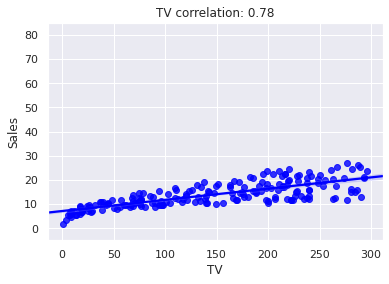

In [7]:
import seaborn as sns; sns.set_theme(color_codes=True) 

tv_marketing_corr = np.corrcoef(analyzed_sales["TV"], analyzed_sales["sales"])

plt.ylim(-5, 85)
tv_marketing = sns.regplot(data=analyzed_sales, x=analyzed_sales["TV"], y=analyzed_sales["sales"], fit_reg=True, truncate=False, color="blue")
plt.title(f"TV correlation: {tv_marketing_corr[0][1]:.2f}")
plt.xlabel("TV")
plt.ylabel("Sales")

Text(0, 0.5, 'Sales')

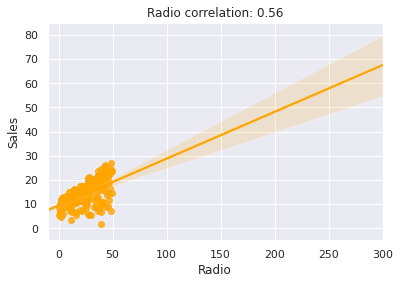

In [8]:
radio_marketing_corr = np.corrcoef(analyzed_sales["radio"], analyzed_sales["sales"])

plt.xlim(-10, 300)
plt.ylim(-5, 85)
tv_marketing = sns.regplot(data=analyzed_sales, x=analyzed_sales["radio"], y=analyzed_sales["sales"], fit_reg=True, truncate=False, color="orange")
plt.title(f"Radio correlation: {radio_marketing_corr[0][1]:.2f}")
plt.xlabel("Radio")
plt.ylabel("Sales")

Text(0, 0.5, 'Sales')

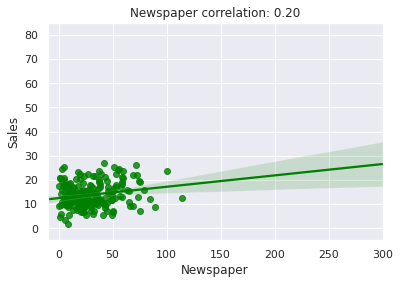

In [9]:
newspaper_marketing_corr = np.corrcoef(analyzed_sales["newspaper"], analyzed_sales["sales"])

plt.ylim(-5, 85)
plt.xlim(-10, 300)
tv_marketing = sns.regplot(data=analyzed_sales, x=analyzed_sales["newspaper"], y=analyzed_sales["sales"], fit_reg=True, truncate=False, color="green")
plt.title(f"Newspaper correlation: {newspaper_marketing_corr[0][1]:.2f}")
plt.xlabel("Newspaper")
plt.ylabel("Sales")

**SEGUNDA PARTE DEL PROYECTO**

Vamos a aumentar el dataset con las siguientes dos columnas generadas:  
- Cantidad total invertida por venta, es decir, coste total (entre los tres canales) dividido por el número de ventas:


In [10]:
quantity_per_sale = (analyzed_sales["TV"] + analyzed_sales["radio"] + analyzed_sales["newspaper"]) / analyzed_sales["sales"]
analyzed_sales["Investment"] = quantity_per_sale
analyzed_sales

,id,TV,radio,newspaper,sales,Investment
0,1,230.1,37.8,69.2,22.1,15.253394
1,2,44.5,39.3,45.1,10.4,12.394231
2,3,17.2,45.9,69.3,9.3,14.236559
3,4,151.5,41.3,58.5,18.5,13.583784
4,5,180.8,10.8,58.4,12.9,19.379845
...,...,...,...,...,...,...
204,195,149.7,35.6,6.0,17.3,11.057803
205,196,38.2,3.7,13.8,7.6,7.328947
206,197,94.2,4.9,8.1,9.7,11.051546
207,198,177.0,9.3,6.4,12.8,15.054688


- Un valor booleano (true/false, o 0/1) que indique si la campaña de marketing fue exitosa. Una campaña es considerada exitosa si se cumplen ambas condiciones siguientes:  
        - Cantidad total invertida por venta es menos de 20€
        - Más de 15000 unidades fueron vendidas

In [11]:
analyzed_sales["Successful"] = np.where((analyzed_sales["Investment"] < 20) & (analyzed_sales["sales"] > 15), True, False)
#indicamos el valor que queremos que se muestre si la condición múltiple se cumple (True)
analyzed_sales

,id,TV,radio,newspaper,sales,Investment,Successful
0,1,230.1,37.8,69.2,22.1,15.253394,True
1,2,44.5,39.3,45.1,10.4,12.394231,False
2,3,17.2,45.9,69.3,9.3,14.236559,False
3,4,151.5,41.3,58.5,18.5,13.583784,True
4,5,180.8,10.8,58.4,12.9,19.379845,False
...,...,...,...,...,...,...,...
204,195,149.7,35.6,6.0,17.3,11.057803,True
205,196,38.2,3.7,13.8,7.6,7.328947,False
206,197,94.2,4.9,8.1,9.7,11.051546,False
207,198,177.0,9.3,6.4,12.8,15.054688,False


In [12]:
analyzed_sales.Successful.value_counts()

False    124
True      70
Name: Successful, dtype: int64

De acuerdo a los resultados obtenidos, teniendo en cuenta ambas condiciones, el número de campañas que fueron exitosas es de 70 campañas frente a las 194 realizadas.

**TERCERA PARTE DEL PROYECTO**

- Crear un conjunto de entrenamiento seleccionando las filas con id <= 160,  
utilizando sklearn.model_selection.train_test_split()

In [13]:
from sklearn.model_selection import train_test_split

x = analyzed_sales[["TV", "radio", "newspaper"]]
y = analyzed_sales["Successful"]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=42, shuffle=False)

- Entrenar un clasificador Gaussian Naive-Bayes para determinar si una campaña será exitosa dadas las cantidades empleadas en cada canal de marketing:

In [14]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(x_train, y_train)
score = clf.score(x_train, y_train)
print(f"Precisión en el set de entrenamiento {clf}: {score:.2f}")

Precisión en el set de entrenamiento GaussianNB(): 0.94


Podemos utilizar otros clasificadores alternativos como regresión logística, para ver cuál de ellos tiene una mayor precisión:

In [15]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0)
clf.fit(x_train, y_train)
score = clf.score(x_train, y_train)
print(f"Precisión en el set de entrenamiento {clf}: {score:.2f}")

Precisión en el set de entrenamiento LogisticRegression(random_state=0): 0.93


**CUARTA PARTE DEL PROYECTO**

- Crear un conjunto de prueba seleccionando las filas con id > 160:

In [16]:
clf = GaussianNB()
clf.fit(x_train, y_train)
score = clf.score(x_test, y_test)
print(f"Precisión en el set de prueba {clf}: {score:.2f}")

Precisión en el set de prueba GaussianNB(): 0.97


In [17]:
clf = LogisticRegression(random_state=0)
clf.fit(x_train, y_train)
score = clf.score(x_test, y_test)
print(f"Precisión en el set de prueba {clf}: {score:.2f}")

Precisión en el set de prueba LogisticRegression(random_state=0): 0.97


En este caso podemos ver que ambas prediciones son más exactas que en el set de entrenamiento.

- ¿Cuál es el número de falsos positivos y falsos negativos?  
- ¿Cuál es la proporción de cada uno de ellos sobre el total de predicciones? 

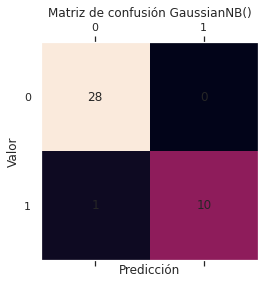

In [18]:
from sklearn.metrics import confusion_matrix, precision_score

clf = GaussianNB()
clf.fit(x_train, y_train)

conf_matr = confusion_matrix(y_test, clf.predict(x_test))
fig, ax = plt.subplots(figsize=(4, 4))
ax.matshow(conf_matr)
ax.grid(False)
plt.title(f"Matriz de confusión {clf}")
plt.ylabel("Valor")
plt.xlabel("Predicción")
for i in range(2):
    for j in range(2):
        ax.text(j, i, conf_matr[i, j], ha="center", va="center")
plt.show()

El valor marcado en rosa claro (0,0) = 28 VP (verdadero positivo).    
El valor marcado en fucsia (1,1) = 10 VN (verdadero negativo).    
Los valores marcados en negro: (0,1) = 1 FN (falso negativo), (1,0) = 0 FP (falso positivo).

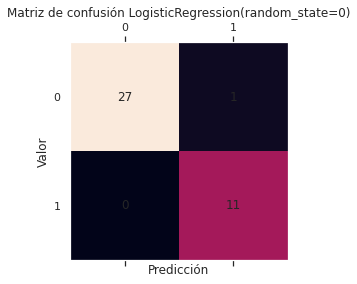

In [20]:
clf = LogisticRegression(random_state=0)
clf.fit(x_train, y_train)

conf_matr = confusion_matrix(y_test, clf.predict(x_test))
fig, ax = plt.subplots(figsize=(4, 4))
ax.matshow(conf_matr)
ax.grid(False)
plt.title(f"Matriz de confusión {clf}")
plt.ylabel("Valor")
plt.xlabel("Predicción")
for i in range(2):
    for j in range(2):
        ax.text(j, i, conf_matr[i, j], ha="center", va="center")
plt.show()

El valor marcado en rosa claro (0,0) = 27 VP (verdadero positivo).  
El valor marcado en fucsia (1,1) = 11 VN (verdadero negativo).  
Los valores marcados en negro: (0,1) = 0 FN (falso negativo), (1,0) = 1 FP (falso positivo)

- ¿Qué porcentaje del conjunto de prueba fue clasificado correctamente (aciertos sobre el total)?  
   Es deseable que este número llegue al menos al 80%:

In [21]:
clf = GaussianNB()
clf.fit(x_train, y_train)

y_predict = clf.predict(x_test)
y_value = y_test
precision = precision_score(y_value, y_predict)
print(f"La precisión en el conjunto de prueba {clf} es: {precision:.2f}")

La precisión en el conjunto de prueba GaussianNB() es: 1.00


In [22]:
clf = LogisticRegression(random_state=0)
clf.fit(x_train, y_train)

y_predict = clf.predict(x_test)
y_value = y_test
precision = precision_score(y_value, y_predict)
print(f"La precisión en el conjunto de prueba {clf} es: {precision:.2f}")

La precisión en el conjunto de prueba LogisticRegression(random_state=0) es: 0.92


Observamos que ambos clasificadores tienen un porcentaje de precisión en el conjunto de prueba por encima del 80%, siendo el más preciso el clasificador Gaussian Naive-Bayes.